# Pointilism usage examples

### Explanation
The module `pointillism` contains classes to build pointillized pictures with colors taken from a source image(s). The base class is `pointillize` and can load directories or single images, and includes the primary methods:
* `plotRecPoints()` plots rectangular arrays of circles of fixed radius
* `plotRandomPoints()` plots random circles of random radius
* `plotRandomPointsComplexity()` plots random circles with radius based on complexity of source image in that area

In addition, the subclass `pointillizeStack` contains methods for building a workflow of image manipulations and then saving gif animations of either the construction of the image or of the final result constructed repeatedly to produce a kind of fluid final picture. Currently only implemented to work on single images. Its subclass `pointillizePile` however is implemented to operate in serial on a large list of images and supports saving gifs in batches as well. 

In the future, support will be provided for loading movie files and saving out pointillized versions of them

### Samples
Some images and gifs I've produced can be found here: https://photos.app.goo.gl/SAQ1DMLrkVxoyjGB3

## Import class definitions

In [34]:
from pointillism import pointillize, pointillizeStack, pointillizePile
% run pointillism.py

# Usage examples

## 1) Read image, run routines to pointillize, and save result

images/pfieffer.jpg


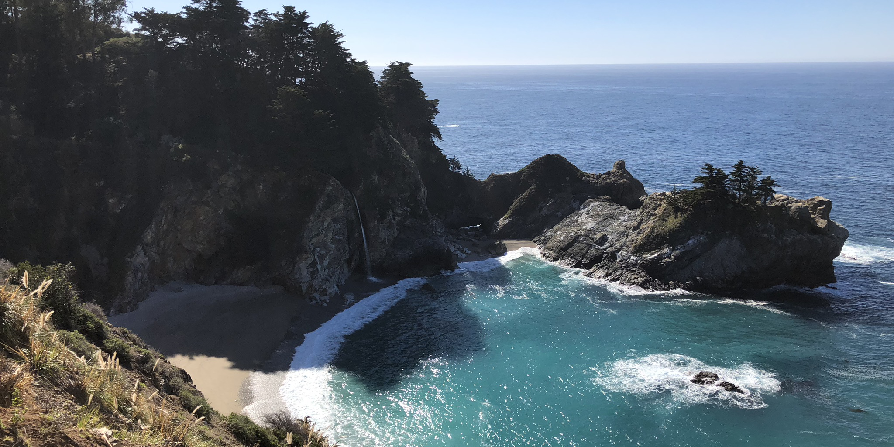

In [35]:
# Create instance on directory or filename
point = pointillize(location='images/pfieffer.jpg', debug = True)

# Crop
point.crop_Y([1000,500], False)

# Display original
point.display(original=True)

In [36]:
# Plot rectangular grid of overlapping circles to fill canvas
point.plotRecPoints(n=40, multiplier=1, fill=False)

# Plot many random points with size proportional to area complexity
point.plotRandomPointsComplexity(n=2e4, constant=0.01, power=1.3, min_size=.001)  

plotRecPoints: done...took 0.32 sec
plotRandomPointsComplexity: done...took 11.79 sec


images/pfieffer.jpg


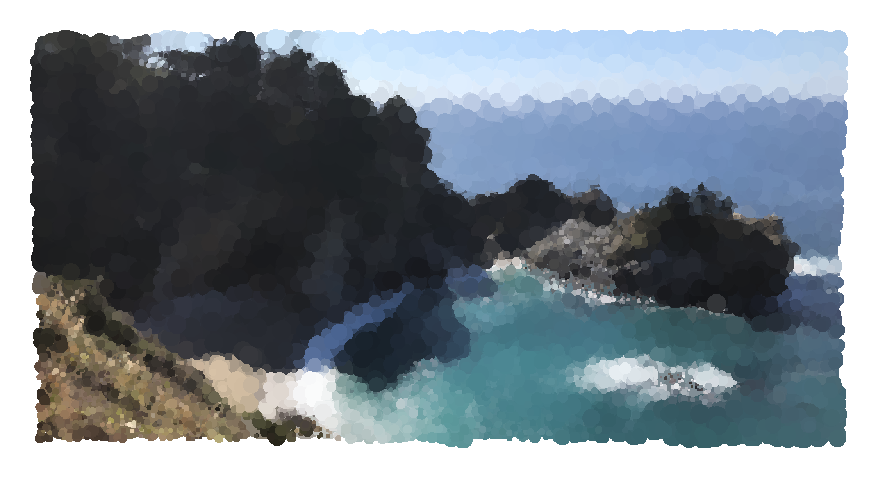

In [37]:
# Display and save
point.display()
point.save_out(location = 'images_out', suffix = 'basic test')

## 2) Build image stacks using `pointillizeStack` and save as gif of intermediate images

In [5]:
%run pointillism.py

In [6]:
# Create instance
point = pointillizeStack(location='images/pfieffer.jpg', debug = True, border = 0)

# Construct queue
point.new_queue()

# Add to queue
point.add_to_queue(point.crop_Y,{'aspect': [1000,500], 'resize': False},1)
point.add_to_queue(point.plotRecPoints,{'n': 40, 'multiplier': 1, 'fill': True},1)
point.add_to_queue(point.plotRandomPointsComplexity,{'n': 2e3, 'constant': 0.01, 'power': 1.3,'min_size': 0.001},10)

# Build image stacks
point.build_stacks(n=1, save_steps=True)

crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done


In [7]:
# Save
point.save_gif('gifs/animated_stacking.gif', step_duration=0.5)

In [8]:
# Display
from IPython.display import HTML
HTML('<img src="gifs/animated_stacking.gif">')

## 3) Build image stacks using `pointillizeStack` and save as gif of final images

In [9]:
# Construct queue
point.new_queue()

# Add to queue
point.add_to_queue(point.crop_Y,{'aspect': [1000,500], 'resize': False},1)
point.add_to_queue(point.plotRecPoints,{'n': 40, 'multiplier': 1, 'fill': True},1)
point.add_to_queue(point.plotRandomPointsComplexity,{'n': 2e3, 'constant': 0.01, 'power': 1.3,'min_size': 0.001},10)

# Build image stacks
point.build_stacks(n=10, save_steps=False)

Building image:  1 2 3 4 5 6 7 8 9 10 done


In [10]:
# Save
point.save_gif('gifs/animated_stacking_loop.gif', step_duration=0.1)

In [11]:
# Display
HTML('<img src="gifs/animated_stacking_loop.gif">')

## 4) Build image stacks using `pointillizeStack` and save as gif of multiplied images

In [12]:
point = pointillizeStack(location='images/pfieffer.jpg', border = 0, debug=True, queue=True)
point.crop_Y([1000,500], resize=False)

In [13]:
point.plotRecPoints(n=40, multiplier=1, fill=False)
point.plotRandomPointsComplexity(n=5e4, constant=0.01, power=1.3, min_size=0.001)

plotRecPoints: done...took 0.35 sec
plotRandomPointsComplexity: done...took 25.43 sec


In [14]:
multipliers = [5,4.5,4,3.5,3,2.6,2.3,2,1.75,1.5,1.25,1.1,1,1,1,1,1]
point.build_multipliers(multipliers, reverse=True)

Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done


In [15]:
point.save_gif('gifs/pointqueue.gif',0.1)

In [31]:
HTML('<img src="gifs/pointqueue.gif">')

## 5. Bulk image processing with `pointillizePile`

In [18]:
# Create instance on directory
point = pointillizePile(location='images_bulk/', debug = True, border = 0)

### Images

In [19]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop_Y,{'aspect': [1000,500], 'resize': False},1)
point.add_to_queue(point.plotRecPoints,{'n': 40, 'multiplier': 1, 'fill': True},1)
point.add_to_queue(point.plotRandomPointsComplexity,{'n': 2e4, 'constant': 0.01, 'power': 1.3,'min_size': 0.001},1)

# Run and save
point.run_pile_images(location = 'images_out', suffix = 'no border')

Batch processing image: 1 2 3 done


### Loop GIFs

In [20]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop_Y,{'aspect': [1000,500], 'resize': False},1)
point.add_to_queue(point.plotRecPoints,{'n': 40, 'multiplier': 1, 'fill': True},1)
point.add_to_queue(point.plotRandomPointsComplexity,{'n': 2e4, 'constant': 0.01, 'power': 1.3,'min_size': 0.001},1)

# Run and save (gifs) in loop mode
point.run_pile_gifs(location = 'images_out/gifs', n=10, save_steps = False, step_duration = 0.1, suffix = 'loop')

1 Building image:  1 2 3 4 5 6 7 8 9 10 done
2 Building image:  1 2 3 4 5 6 7 8 9 10 done
3 Building image:  1 2 3 4 5 6 7 8 9 10 done


### Assembly gifs

In [21]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop_Y,{'aspect': [1000,500], 'resize': False},1)
point.add_to_queue(point.plotRecPoints,{'n': 40, 'multiplier': 1, 'fill': True},1)
point.add_to_queue(point.plotRandomPointsComplexity,{'n': 2e3, 'constant': 0.01, 'power': 1.3,'min_size': 0.001},10)

# Run and save (gifs) in assembly mode
point.run_pile_gifs(location = 'images_out/gifs', n=1, save_steps = True, step_duration = 0.5, suffix = 'assembly')

1 crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done
2 crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done
3 crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done


### Multiplier gifs

In [22]:
# Create instance on directory
point = pointillizePile(location='images/', debug=True, border=0, queue=True)

In [23]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop_Y,{'aspect': [1000,500], 'resize': False},1)
point.add_to_queue(point.plotRecPoints,{'n': 40, 'multiplier': 1, 'fill': True},1)
point.add_to_queue(point.plotRandomPointsComplexity,{'n': 2e4, 'constant': 0.01, 'power': 1.3,'min_size': 0.001},1)

# Run and save (gifs) in multiplier mode
multipliers = [5,4.5,4,3.5,3,2.6,2.3,2,1.75,1.5,1.25,1.1,1,1,1,1,1]
point.run_pile_multipliers(location = 'images_out/gifs', multipliers = multipliers,
                           step_duration = 0.1, suffix = 'muliplier')

1 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done
2 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done
3 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done
4 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done
5 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done
6 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done
7 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done
8 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done
9 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done
10 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done
11 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done
12 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done


# Documentation

In [24]:
# Help on module
import pointillism
help(pointillism)

Help on module pointillism:

NAME
    pointillism - This module contains classes that help create pointillized images.

CLASSES
    builtins.object
        pointillize
            pointillizeStack
                pointillizePile
    
    class pointillize(builtins.object)
     |  Base class for pointillzation project
     |  
     |  Methods defined here:
     |  
     |  __init__(self, *args, **kwargs)
     |      Initiialize with image or directory
     |  
     |  crop_Y(self, aspect, resize)
     |      Crops and resizes in the height dimension to match aspect ratio
     |  
     |  display(self, **kwargs)
     |      Displays browser-size version of outputs, or original images
     |      if original=True
     |  
     |  plotRandomPointsComplexity(self, n, constant, power, min_size, **kwargs)
     |      plots random points over image, where constant is
     |      the portion of the diagonal for the max size of the bubble,
     |      and power pushes the distribution towards sm